In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from PIL import Image
import glob
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path =   "/content/drive/MyDrive/Class 1.zip (Unzipped Files)"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")



0  images to be resized.
0  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지

image_dir_path =   "/content/drive/MyDrive/바위.zip (Unzipped Files)"
resize_images(image_dir_path)

0  images to be resized.
0  images resized.


In [5]:
# 보 이미지
image_dir_path = "/content/drive/MyDrive/보.zip (Unzipped Files)"
resize_images(image_dir_path)


0  images to be resized.
0  images resized.


In [6]:
from numpy.lib.arraysetops import in1d
import numpy as np

def load_data(img_path, number_of_data=312):   #이미지 개수 총합 312
    # 가위: 0, 바위: 1, 보: 2
    img_size=28
    color=3
    # 이미지 데이터와 라벨(가위: 0, 바위: 1, 보: 2) 데이터를 담을 행렬(matrix)영역 생성.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/Class 1.zip (Unzipped Files)/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/바위.zip (Unzipped Files)/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  #데이터 영역에 이미지 행렬을 복사
        labels[idx]=1 # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/보.zip (Unzipped Files)/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx]=2  # 보 : 2

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/가위바위보'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 212 입니다.
x_train shape: (312, 28, 28, 3)
y_train shape: (312,)


In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보자.
# Hint! model의 입력/출력부에 특히 유의 할 것!. 가위바위보 데이터 셋은 MNIST 데이터셋과 어떤 점이 달라졌나?
# [[MY Code]]----
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수:', len(model.layers))
model.summary()

Model에 추가된 Layer 개수: 8
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dropout (Dropout)           (Non

**2.2 모델 학습하기**
굵은 텍스트**
Dataset이 커질수록 epoch 수를 늘려가는 편이좋다.
연속 촬영된 데이터셋이나 일련의 연속된 이미지를 학습하기 보다 순서를 섞어 주는 것이 학습에 더 도움된다.






In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 # 모델 훈련
history = model.fit(x_train, y_train, epochs = 19, shuffle = True) 


Epoch 1/19
10/10 [==============================] - 1s 27ms/step - loss: 10.5378 - accuracy: 0.6378
Epoch 2/19
10/10 [==============================] - 0s 26ms/step - loss: 1.7083 - accuracy: 0.8397
Epoch 3/19
10/10 [==============================] - 0s 27ms/step - loss: 0.9714 - accuracy: 0.9038
Epoch 4/19
10/10 [==============================] - 0s 25ms/step - loss: 0.7373 - accuracy: 0.9263
Epoch 5/19
10/10 [==============================] - 0s 27ms/step - loss: 0.4841 - accuracy: 0.9519
Epoch 6/19
10/10 [==============================] - 0s 26ms/step - loss: 0.2521 - accuracy: 0.9712
Epoch 7/19
10/10 [==============================] - 0s 30ms/step - loss: 0.1854 - accuracy: 0.9872
Epoch 8/19
10/10 [==============================] - 0s 26ms/step - loss: 0.1658 - accuracy: 0.9872
Epoch 9/19
10/10 [==============================] - 0s 26ms/step - loss: 0.1555 - accuracy: 0.9904
Epoch 10/19
10/10 [==============================] - 0s 26ms/step - loss: 0.1501 - accuracy: 0.9936
Epoch 11

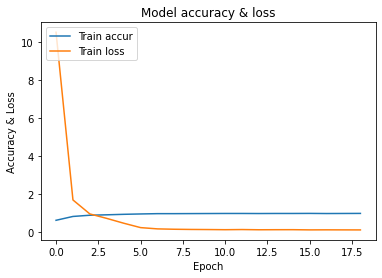

In [9]:
# 훈련과정 시각화( 정확도와 손실)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Model accuracy & loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy & Loss')
plt.legend(['Train accur', 'Train loss'], loc='upper left')
plt.show()

# 3. 모델 확인하기



**3-1.  모델 평가하기**
--- Test set 을 활용해 fit함수로 학습된 model의 성능을 확인한다.


# 회고

난 회고한다.


 이미 다른 사람이 해 놓은 코드를 따라 치다가 길을 잃었다. 보고 치던 자료를 못찾음.
훈성님이 코드가 똑같다며 다른 사람의 자료를 찾아 주었으나, 이 조금을 못 고친다. 오늘은  조퇴를 해야하니 여기서 끝낸다. 아, 아쉽다. 항상 한발 더 가고 싶다.

**보고 따라 칠 때는 눈에 익은 것 같다가도 막상 눈앞에서 사라지면 깜깜하다. 그래도...
뭔가 익숙해 지는 느낌은 있다. 이렇게라도 계속하면 혹시 내가 코드 한 줄 내 힘으로 고치는 날이 오려나~~??
밀린 노드를 해야하니, 아쉽지만 여기까지 만 한다. 매우 아쉽다.**